In [4]:
import pandas as pd
import numpy as np

In [5]:
# Loading data
movies = pd.read_csv(r"C:\Users\Mohammed\Desktop\Movie-Success-Predictor\dataset\movies_metadata.csv", low_memory=False)
credits = pd.read_csv(r"C:\Users\Mohammed\Desktop\Movie-Success-Predictor\dataset\credits.csv")
keywords = pd.read_csv(r"C:\Users\Mohammed\Desktop\Movie-Success-Predictor\dataset\keywords.csv")

In [6]:
print("Movies shape", movies.shape)
print('Credits shape', credits.shape)
print('Keywords shape', keywords.shape)

Movies shape (45466, 24)
Credits shape (45476, 3)
Keywords shape (46419, 2)


In [7]:
# Understand the data 

In [8]:
movies.head()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [9]:
credits.head()
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [10]:
keywords.head()
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [11]:
# Checking missing value

In [12]:
movies.isnull().sum()
credits.isnull().sum()
keywords.isnull().sum()

id          0
keywords    0
dtype: int64

In [13]:
movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [14]:
# Convert released date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

In [15]:
# Convert budget and popularity to numeric  (handle errors)
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')

In [16]:
# Convert ID to numeric 
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')

In [17]:
movies.dtypes

adult                            object
belongs_to_collection            object
budget                          float64
genres                           object
homepage                         object
id                              float64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                            object
vote_average                    float64
vote_count                      float64
dtype: object

In [18]:
credits.head()
credits.dtypes

cast    object
crew    object
id       int64
dtype: object

In [19]:
keywords.head()
keywords.dtypes

id           int64
keywords    object
dtype: object

In [20]:
# converting movied id into integer
movies.loc[:,'id'] = pd.to_numeric(movies['id'], errors='coerce')
movies = movies.dropna(subset=['id'])
movies.loc[:,'id'] = movies['id'].astype(int)

C:\Users\Mohammed\AppData\Local\Temp\ipykernel_15060\2282977547.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  movies.loc[:,'id'] = movies['id'].astype(int)


In [21]:
print(movies['id'].dtype)

int32


In [22]:
# Merge credits
movies = movies.merge(credits, on='id')

In [23]:
# Merge keywords
movies = movies.merge(keywords, on='id')

In [24]:
print(movies.shape)
movies.head()

(46628, 27)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [25]:
# extracting the director name from column crew
import ast

In [26]:
def get_director(crew):
    try:
        crew = ast.literal_eval(crew)
        for member in crew:
            if member['job'] == 'Director':
                return member['name']
    except:
        return None

movies['director'] = movies['crew'].apply(get_director)

In [27]:
# Extract top 3 cast members from the cast column
def get_top_cast(cast):
    try:
        cast = ast.literal_eval(cast)
        names = [actor['name'] for actor in cast[:3]]
        return ', '.join(names)
    except:
        return None

movies['top_cast'] = movies['cast'].apply(get_top_cast)

In [28]:
# Convert genres to readable format
def get_genres(genres):
    try:
        genres = ast.literal_eval(genres)
        names = [genre['name'] for genre in genres]
        return ', '.join(names)
    except:
        return None

movies['genres'] = movies['genres'].apply(get_genres)

In [29]:
# Converts Keywords to readable format
def get_keywords(keywords):
    try:
        keywords = ast.literal_eval(keywords)
        names = [kw['name'] for kw in keywords]
        return ', '.join(names)
    except:
        return None

movies['keywords'] = movies['keywords'].apply(get_keywords)

In [30]:
movies[['title', 'director', 'top_cast', 'genres', 'keywords']].head(10)

,title,director,top_cast,genres,keywords
0,Toy Story,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles","Animation, Comedy, Family","jealousy, toy, boy, friendship, friends, rival..."
1,Jumanji,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst","Adventure, Fantasy, Family","board game, disappearance, based on children's..."
2,Grumpier Old Men,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret","Romance, Comedy","fishing, best friend, duringcreditsstinger, ol..."
3,Waiting to Exhale,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devine","Comedy, Drama, Romance","based on novel, interracial relationship, sing..."
4,Father of the Bride Part II,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short",Comedy,"baby, midlife crisis, confidence, aging, daugh..."
5,Heat,Michael Mann,"Al Pacino, Robert De Niro, Val Kilmer","Action, Crime, Drama, Thriller","robbery, detective, bank, obsession, chase, sh..."
6,Sabrina,Sydney Pollack,"Harrison Ford, Julia Ormond, Greg Kinnear","Comedy, Romance","paris, brother brother relationship, chauffeur..."
7,Tom and Huck,Peter Hewitt,"Jonathan Taylor Thomas, Brad Renfro, Rachael L...","Action, Adventure, Drama, Family",
8,Sudden Death,Peter Hyams,"Jean-Claude Van Damme, Powers Boothe, Dorian H...","Action, Adventure, Thriller","terrorist, hostage, explosive, vice president"
9,GoldenEye,Martin Campbell,"Pierce Brosnan, Sean Bean, Izabella Scorupco","Adventure, Action, Thriller","cuba, falsely accused, secret identity, comput..."


# EDA Analysis

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
numeric_cols = movies[['budget','revenue', 'popularity', 'vote_average', 'vote_count']]

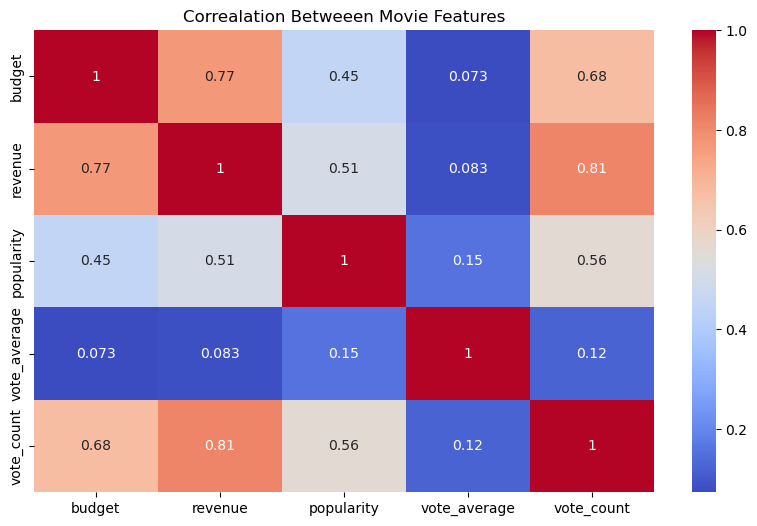

In [34]:
# heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correalation Betweeen Movie Features")
plt.show()

Top 10 Movies Genres by Average Revenue

In [36]:
# explode the genre list to separate rows
genre_df = movies.explode('genres')

In [37]:
top_genres = genre_df.groupby('genres')['revenue'].mean().sort_values(ascending=False).head(10)

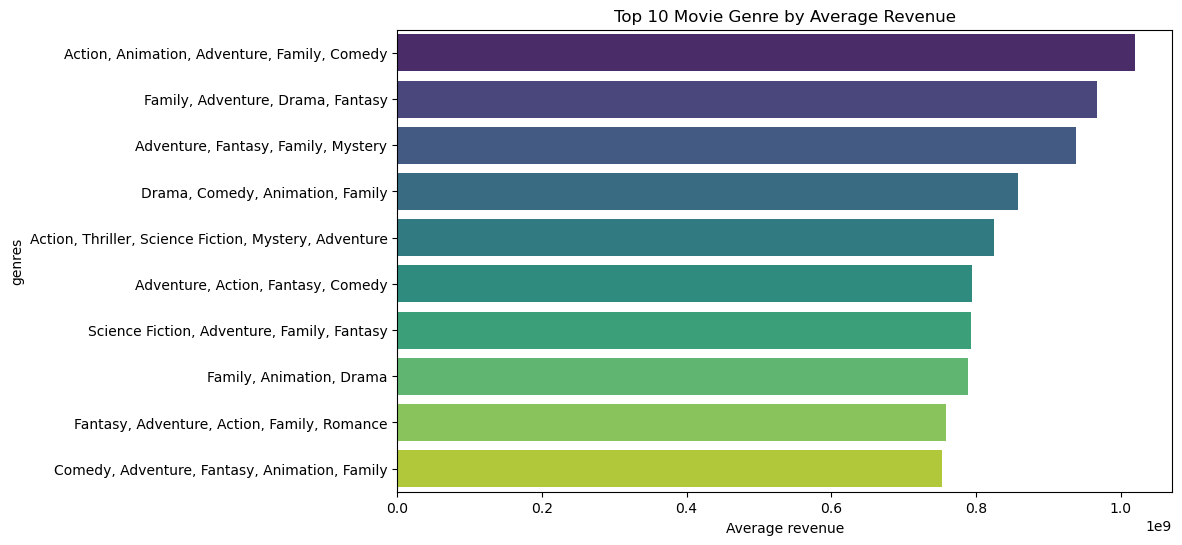

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.xlabel("Average revenue")
plt.title("Top 10 Movie Genre by Average Revenue")
plt.show()

In [39]:
movies['crew'] = movies['crew'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

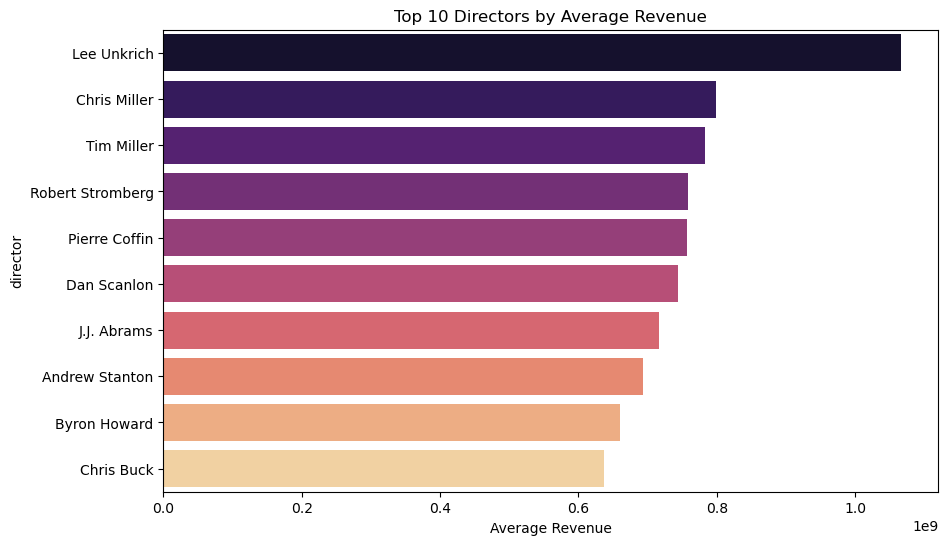

In [40]:
def get_director(crew_list):
    for person in crew_list:
        if person['job'] == 'Director':
            return person['name']
    return None

movies['director'] = movies['crew'].apply(get_director)

top_directors = movies.groupby('director')['revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.xlabel("Average Revenue")
plt.title("Top 10 Directors by Average Revenue")
plt.show()


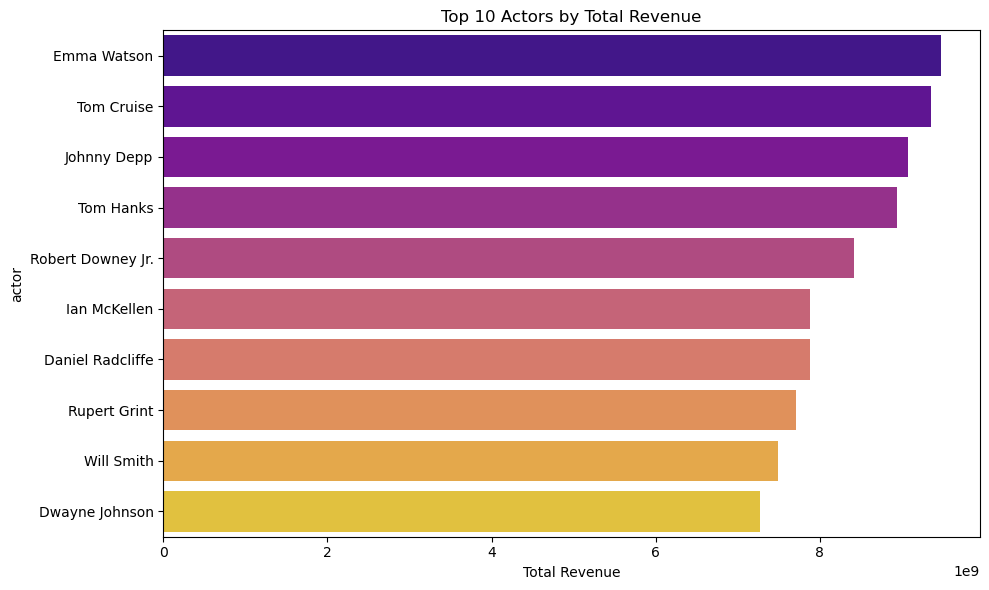

In [41]:
import ast

# Convert 'cast' from string to list of dicts
movies['cast'] = movies['cast'].apply(ast.literal_eval)

def get_top_actors(cast_list):
    return [actor['name'] for actor in cast_list[:3]]

# Create a new column with top 3 actors
movies['top_actors'] = movies['cast'].apply(get_top_actors)

# Explode the actors so each row contains one actor
actors_exploded = movies[['id', 'title', 'revenue', 'top_actors']].explode('top_actors')
actors_exploded = actors_exploded.rename(columns={'top_actors': 'actor'})


top_actors_revenue = (
    actors_exploded.groupby('actor')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors_revenue.values, y=top_actors_revenue.index, palette='plasma')
plt.xlabel('Total Revenue')
plt.title('Top 10 Actors by Total Revenue')
plt.tight_layout()
plt.show()

Budget vs Revenue

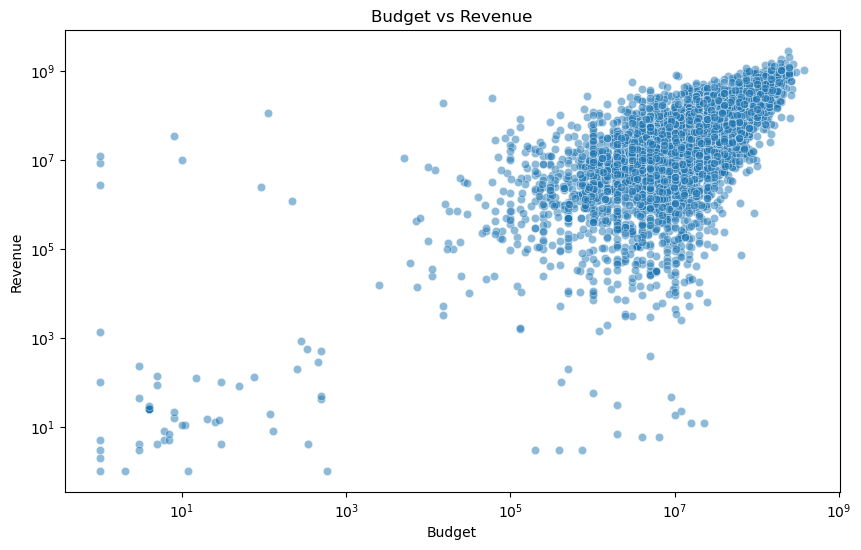

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=movies, x='budget', y='revenue', alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

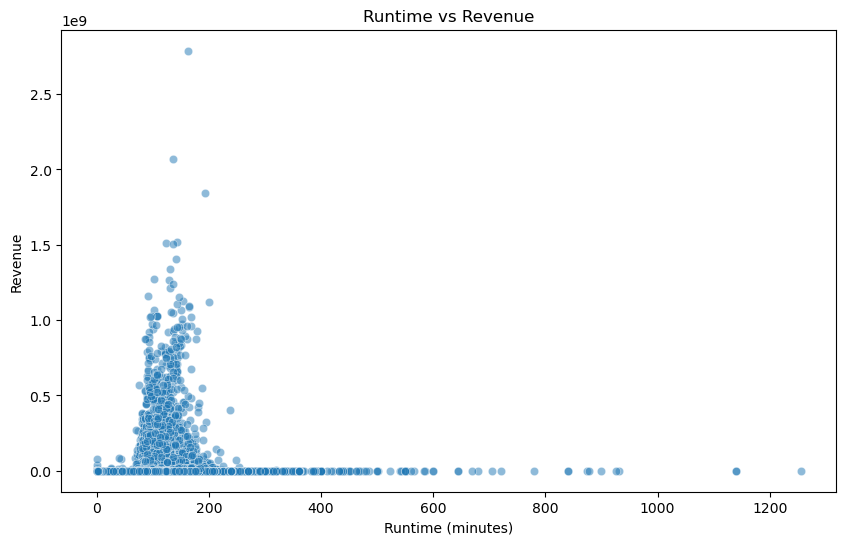

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=movies, x='runtime', y='revenue', alpha=0.5)
plt.title('Runtime vs Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue')
plt.show()

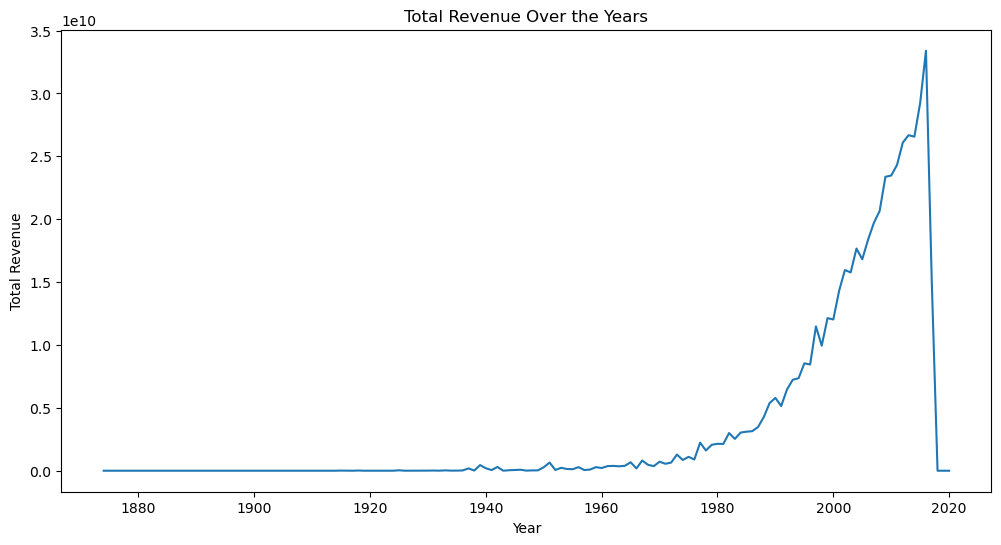

In [45]:
movies['release_year'] = movies['release_date'].dt.year
yearly_revenue = movies.groupby('release_year')['revenue'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values)
plt.title('Total Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

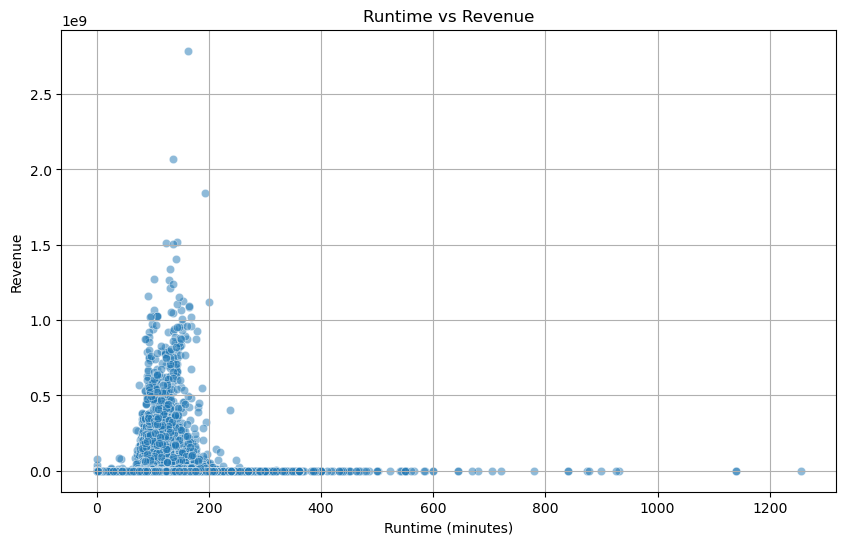

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='runtime', y='revenue', alpha=0.5)
plt.title('Runtime vs Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

Revenue Trends Over the Years

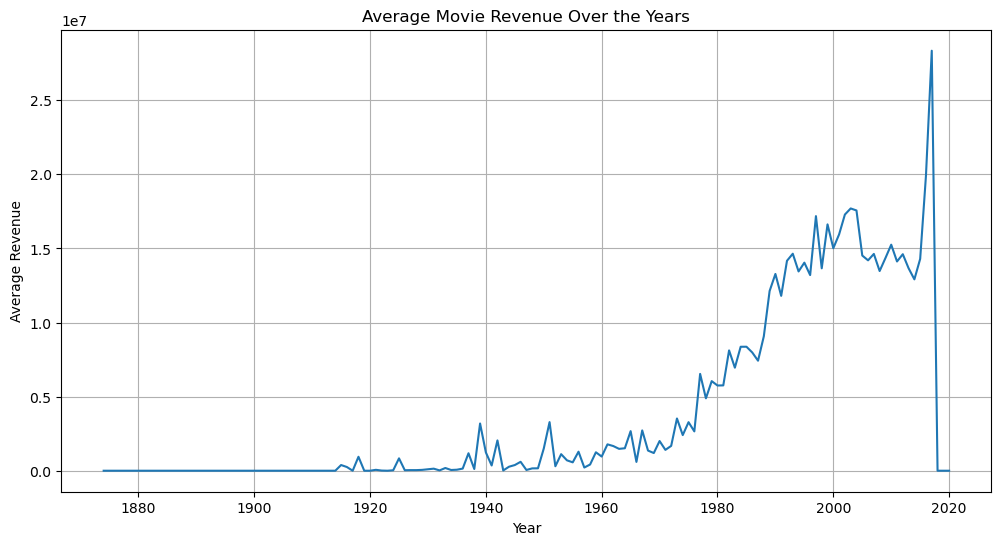

In [48]:
movies['release_year'] = movies['release_date'].dt.year
yearly_revenue = movies.groupby('release_year')['revenue'].mean()


# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values)
plt.title('Average Movie Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()

In [49]:
language_revenue = movies.groupby('original_language')['revenue'].mean().sort_values(ascending=False).head(10)

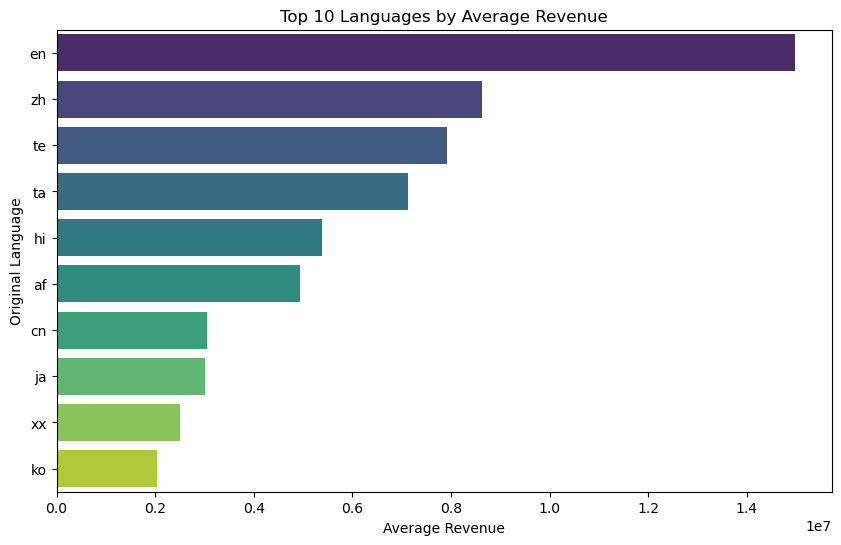

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=language_revenue.values, y=language_revenue.index, palette='viridis')
plt.title('Top 10 Languages by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Original Language')
plt.show()

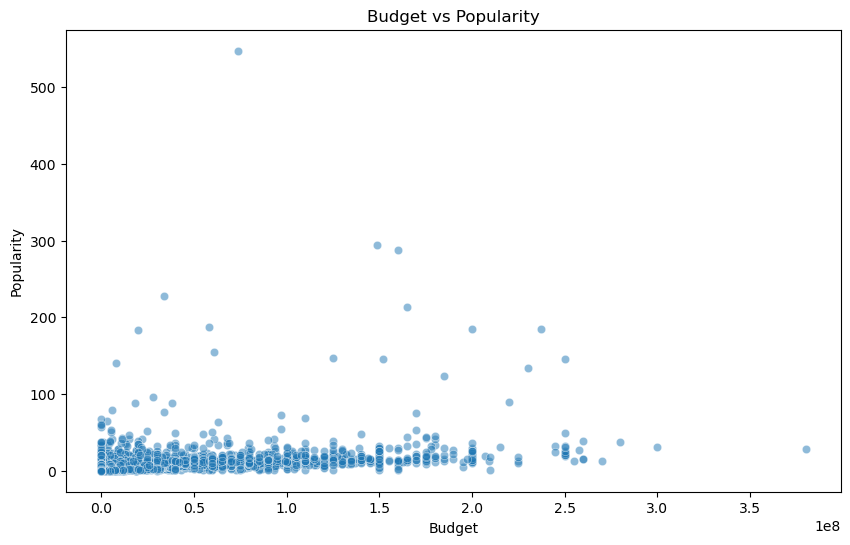

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=movies, x='budget', y='popularity', alpha=0.5)
plt.title('Budget vs Popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.show()

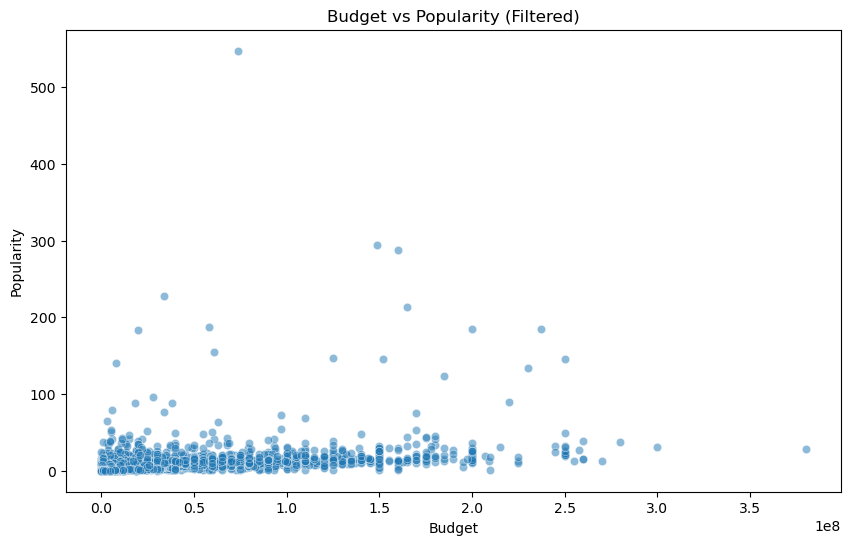

In [52]:
filtered = movies[(movies['budget'] > 0) & (movies['popularity'] > 0)]
plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered, x='budget', y='popularity', alpha=0.5)
plt.title('Budget vs Popularity (Filtered)')
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.show()

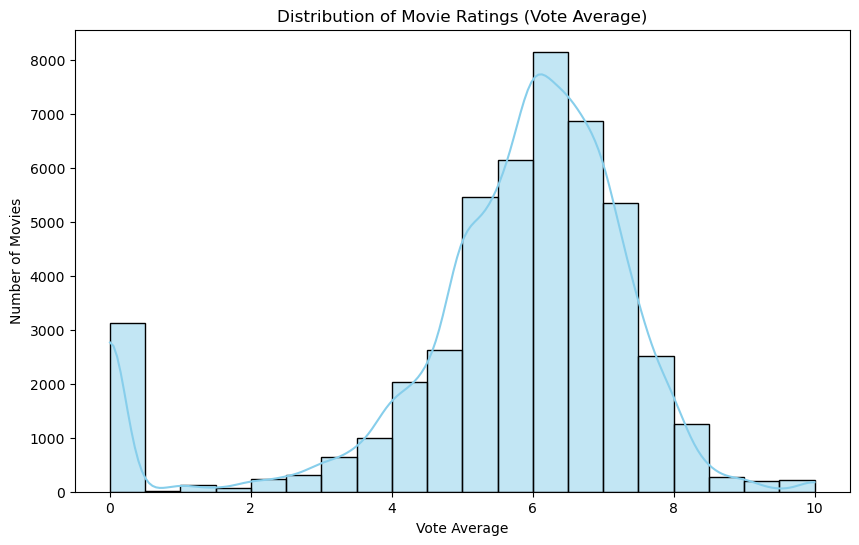

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings (Vote Average)')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.show()

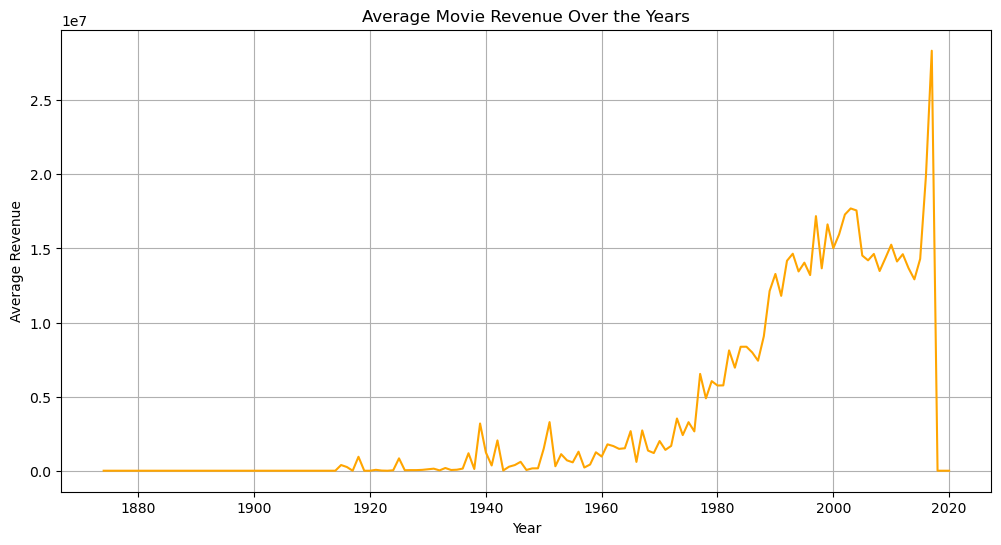

In [54]:
# Grouping by year and calculating average revenue
revenue_by_year = movies.groupby(movies['release_date'].dt.year)['revenue'].mean()

plt.figure(figsize=(12, 6))
revenue_by_year.plot(kind='line', color='orange')
plt.title('Average Movie Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()

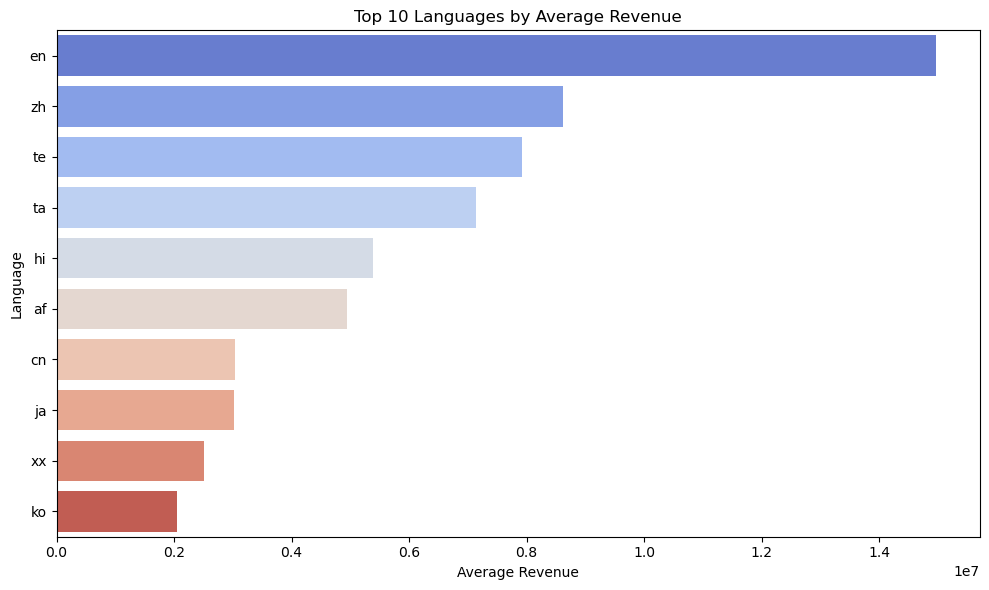

In [55]:
# Grouping by original_language and calculating average revenue
language_revenue = movies.groupby('original_language')['revenue'].mean().sort_values(ascending=False).head(10)

# Plotting the top 10 languages by average revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=language_revenue.values, y=language_revenue.index, palette='coolwarm')
plt.title('Top 10 Languages by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Language')
plt.tight_layout()
plt.show()

Convert production_companies column from string to actual lists:

In [57]:

def safe_parse(x):
    try:
        if isinstance(x, list):
            return x  # already parsed
        elif pd.isnull(x):
            return []
        else:
            return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

# Apply the safer function
movies['production_companies'] = movies['production_companies'].apply(safe_parse)

In [58]:
# Create a dictionary to hold revenue by production company
company_revenue = {}

for index, row in movies.iterrows():
    for company in row['production_companies']:
        name = company.get('name')
        revenue = row['revenue']
        if name:
            company_revenue[name] = company_revenue.get(name, 0) + revenue


In [59]:
# Convert dictionary to DataFrame
company_revenue_df = pd.DataFrame(list(company_revenue.items()), columns=['Company', 'Total Revenue'])
top_companies = company_revenue_df.sort_values(by='Total Revenue', ascending=False).head(10)

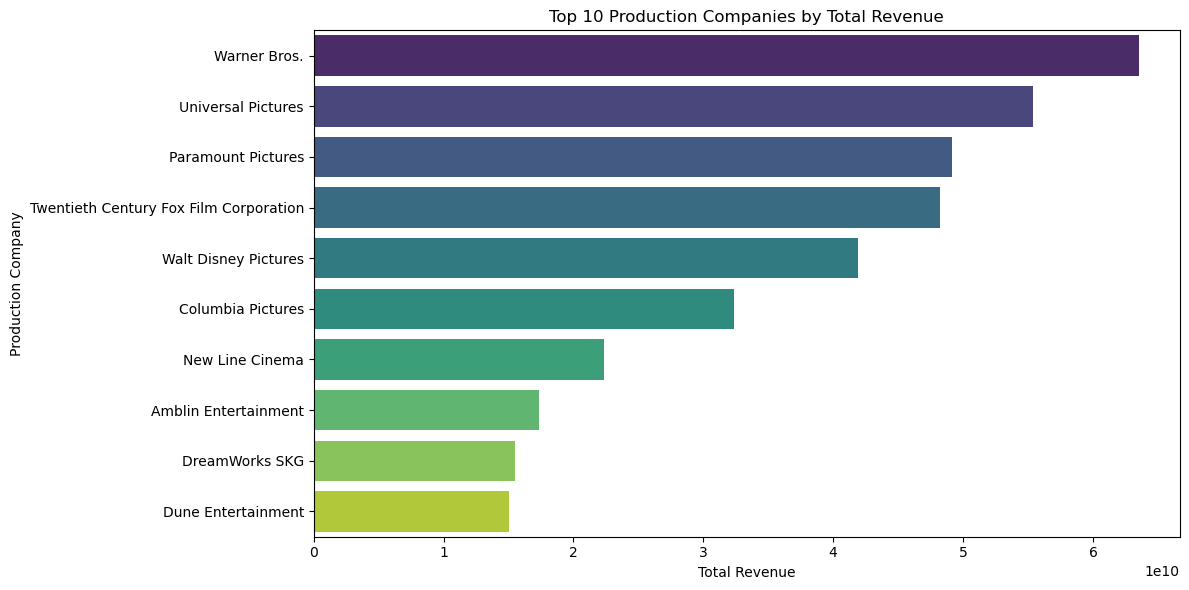

In [60]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Revenue', y='Company', data=top_companies, palette='viridis')
plt.title('Top 10 Production Companies by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Production Company')
plt.tight_layout()
plt.show()

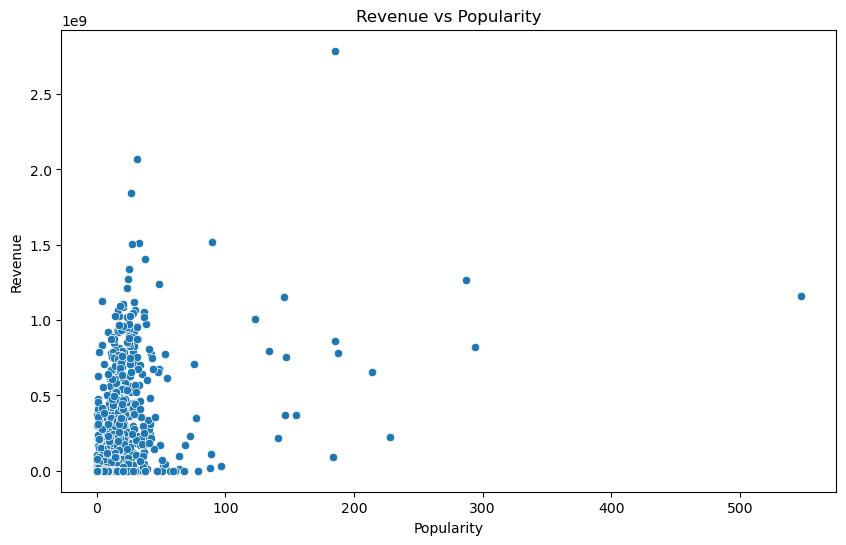

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='popularity', y='revenue')
plt.title('Revenue vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

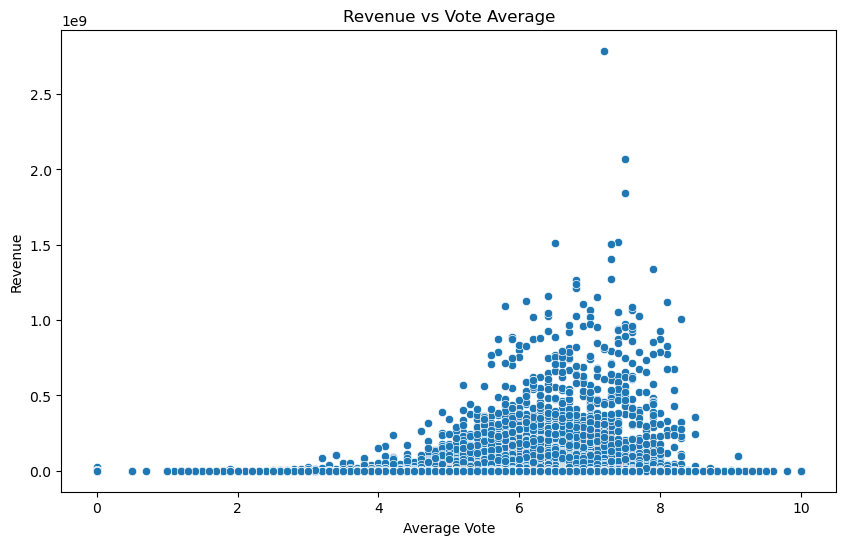

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='vote_average', y='revenue')
plt.title('Revenue vs Vote Average')
plt.xlabel('Average Vote')
plt.ylabel('Revenue')
plt.show()

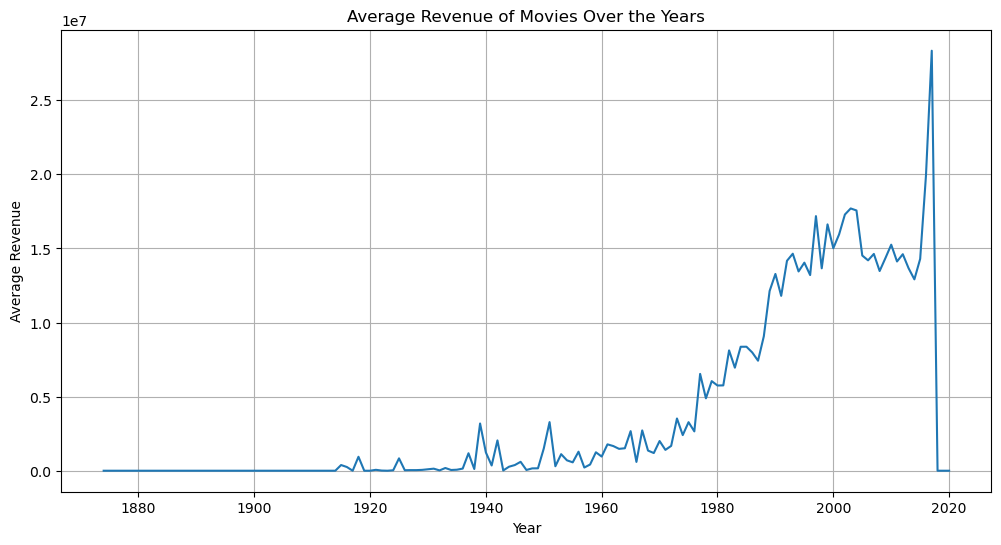

In [63]:
# Extract release year
movies['release_year'] = movies['release_date'].dt.year

# Group by year and calculate average revenue
revenue_by_year = movies.groupby('release_year')['revenue'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=revenue_by_year.index, y=revenue_by_year.values)
plt.title('Average Revenue of Movies Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()


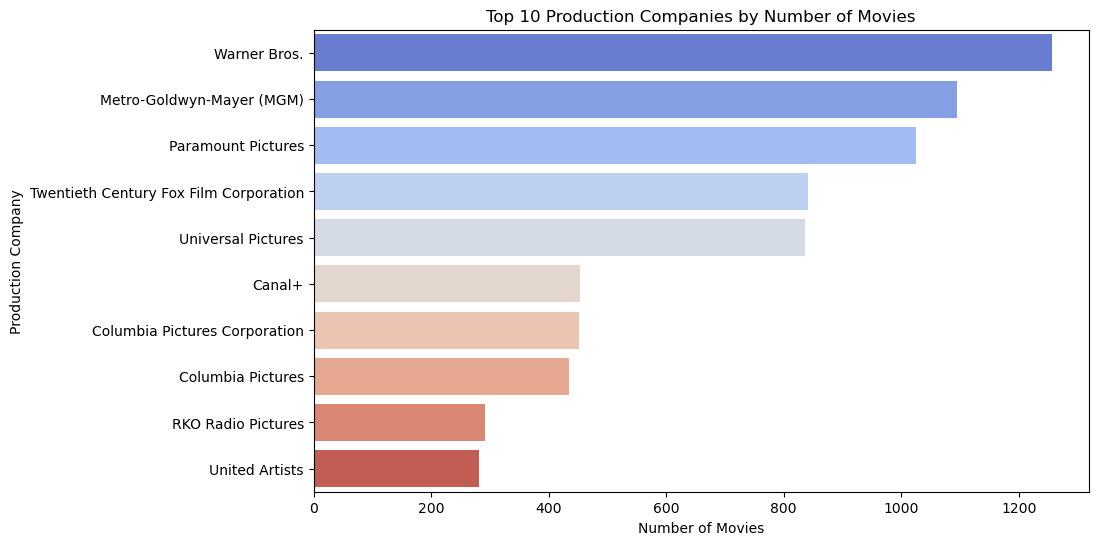

In [64]:
# Extract company names
all_production_companies = movies['production_companies'].explode()
company_counts = pd.Series([company['name'] for company in all_production_companies if isinstance(company, dict)]).value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=company_counts.values, y=company_counts.index, palette='coolwarm')
plt.title('Top 10 Production Companies by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Production Company')
plt.show()


Selecting Feature target

In [166]:
features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']
X = movies[features]
y = movies['revenue']

In [168]:
x = X.fillna(0)
y = y.fillna(0)

In [178]:
print(X.isnull().sum())
print(y.isnull().sum())

budget            0
popularity        4
runtime         268
vote_average      4
vote_count        4
dtype: int64
0


In [180]:
# Drop rows with any NaNs in X
X = X.dropna()
y = y[X.index]  # Align y with the cleaned X

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [192]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)


In [194]:
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2 Score):', r2)

Mean Absolute Error (MAE): 9935907.712263806
Mean Squared Error (MSE): 1116294504711399.2
Root Mean Squared Error (RMSE): 33410993.770185873
R-squared (R2 Score): 0.7165219201732462


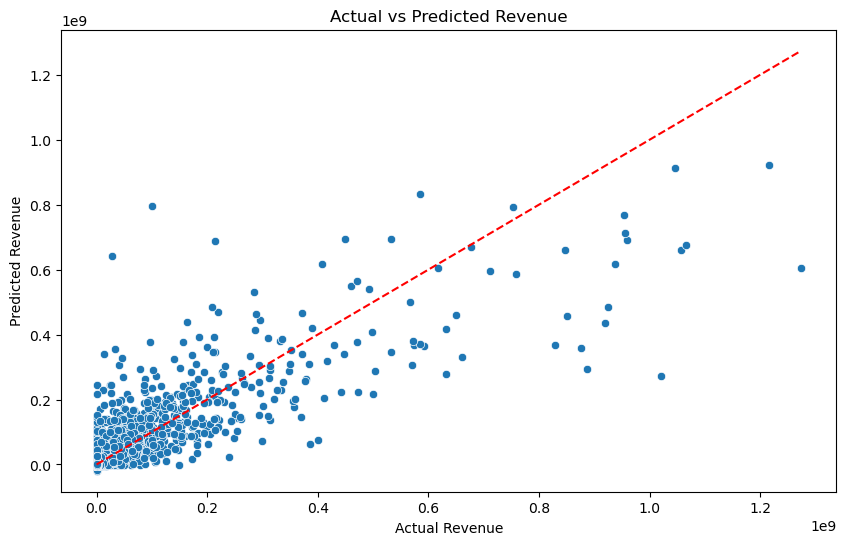

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluation
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R² Score:", rf_r2)


TypeError: got an unexpected keyword argument 'squared'

In [204]:
import numpy as np

# Evaluation (Fixed)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)  # manually calculate RMSE
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R² Score:", rf_r2)


Random Forest Results:
MAE: 6573839.1341425795
RMSE: 29941557.449394267
R² Score: 0.7723385647082424


In [209]:
movies['Success_Label'] = movies.apply(
    lambda x: 'Hit' if x['revenue'] >= 1.5 * x['budget'] else 'Flop',
    axis=1
)

In [211]:
movies['Success_Label'].value_counts()

Hit     40809
Flop     5819
Name: Success_Label, dtype: int64

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features
features = ['budget', 'popularity', 'runtime', 'vote_average']
X = movies[features]

# Encode target label
le = LabelEncoder()
y = le.fit_transform(movies['Success_Label'])  # Hit = 1, Flop = 0

In [215]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [217]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [219]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9496032597040532
              precision    recall  f1-score   support

        Flop       0.76      0.85      0.80      1110
         Hit       0.98      0.96      0.97      8216

    accuracy                           0.95      9326
   macro avg       0.87      0.90      0.89      9326
weighted avg       0.95      0.95      0.95      9326



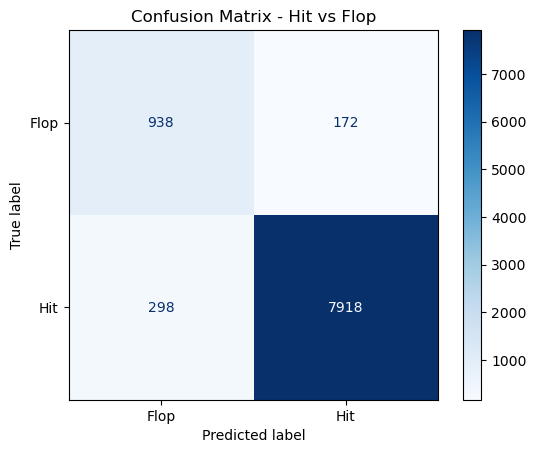

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix - Hit vs Flop")
plt.show()

In [223]:
import joblib

# Save trained classifier
joblib.dump(clf, 'movie_success_predictor.pkl')

# Optional: Save X.columns for later use
joblib.dump(X.columns, 'movies_columns.pkl')


['movies_columns.pkl']